# Pokemons dataset analysis
In this analysis i'm looking for features that make pokemon legendary.  
To do that i'm using Python with `Panda`, `matplotlib`, `Seaborn` and `NumPy` liblarys.

In [2]:
# libs import
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## 1. Load, preparing and recognition the data

In [3]:
# load dataset and first look at data 
pokemon_csv_url = 'https://gist.githubusercontent.com/armgilles/194bcff35001e7eb53a2a8b441e8b2c6/raw/92200bc0a673d5ce2110aaad4544ed6c4010f687/pokemon.csv'

pokemons_df = pd.read_csv(pokemon_csv_url)
pokemons_df

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


Let's find if our dataset containing any duplicate pokemons.

In [4]:
pokemons_df[pokemons_df.duplicated('#', keep=False)]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
787,711,GourgeistSuper Size,Ghost,Grass,494,85,100,122,58,75,54,6,False
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True


Duplacates in our dataset means that some pokemons have other form (like Charizard at '#'= 6). Let's drop it.

In [5]:
pokemons_df.drop_duplicates('#', keep = 'first', inplace=True)
pokemons_df

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
793,717,Yveltal,Dark,Flying,680,126,131,95,131,98,99,6,True
794,718,Zygarde50% Forme,Dragon,Ground,600,108,100,121,81,95,95,6,True
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True


In [6]:
pokemons_df.drop(columns=['#'], inplace=True)

In [7]:
# first look at data type
pokemons_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 721 entries, 0 to 799
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        721 non-null    object
 1   Type 1      721 non-null    object
 2   Type 2      350 non-null    object
 3   Total       721 non-null    int64 
 4   HP          721 non-null    int64 
 5   Attack      721 non-null    int64 
 6   Defense     721 non-null    int64 
 7   Sp. Atk     721 non-null    int64 
 8   Sp. Def     721 non-null    int64 
 9   Speed       721 non-null    int64 
 10  Generation  721 non-null    int64 
 11  Legendary   721 non-null    bool  
dtypes: bool(1), int64(8), object(3)
memory usage: 68.3+ KB


All columns have no Null values except `Type 2`. After compared it with data i think, that's no problem because it's somethink like additional power or element and a lot of pokemons have only one.  
  
To get some better memory optimalization we can change `Type 1` and `Type 2` columns data type to categorical. 

In [8]:
print(len(set(pokemons_df['Type 1'].unique())))
print(len(set(pokemons_df['Type 2'].unique())))
# `Type 2` has one more type then `Type 1`, let's check it

18
19


In [9]:
set(pokemons_df['Type 2'].unique())-set(pokemons_df['Type 1'].unique())

{nan}

In [10]:
# pokemons_df['Type 2'].fillna(value='None', inplace=True)

It's nan value. So i will use `Type 1` unique values to make both column categorical  
(nan value cannot be use to as categorical value) and replace nan to None.

In [11]:
unique_type = pokemons_df['Type 1'].unique()
pokemons_df['Type 1'] = pd.Categorical(pokemons_df['Type 1'], unique_type)
pokemons_df['Type 2'] = pd.Categorical(pokemons_df['Type 2'], unique_type)
pokemons_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 721 entries, 0 to 799
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Name        721 non-null    object  
 1   Type 1      721 non-null    category
 2   Type 2      350 non-null    category
 3   Total       721 non-null    int64   
 4   HP          721 non-null    int64   
 5   Attack      721 non-null    int64   
 6   Defense     721 non-null    int64   
 7   Sp. Atk     721 non-null    int64   
 8   Sp. Def     721 non-null    int64   
 9   Speed       721 non-null    int64   
 10  Generation  721 non-null    int64   
 11  Legendary   721 non-null    bool    
dtypes: bool(1), category(2), int64(8), object(1)
memory usage: 60.0+ KB


8.3 KB saved :D It's not much, but our dataset containing only 800 rows.  
In bigger datasets it's more usefull

In [12]:
pokemons_df.describe()

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000
mean,417.945908,68.380028,75.124827,70.697642,68.848821,69.180305,65.714286,3.323162
std,109.663671,25.848272,29.070335,29.194941,28.898590,26.899364,27.277920,1.669873
min,180.000000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.000000
25%,320.000000,50.000000,54.000000,50.000000,45.000000,50.000000,45.000000,2.000000
50%,424.000000,65.000000,75.000000,65.000000,65.000000,65.000000,65.000000,3.000000
75%,499.000000,80.000000,95.000000,85.000000,90.000000,85.000000,85.000000,5.000000
max,720.000000,255.000000,165.000000,230.000000,154.000000,230.000000,160.000000,6.000000


Every value is higher than 0 and in my opinion this dataset has already no false values.  
Let's make some plots for better look at our data.

Text(0.5, 1.0, "Pokemon's Stats")

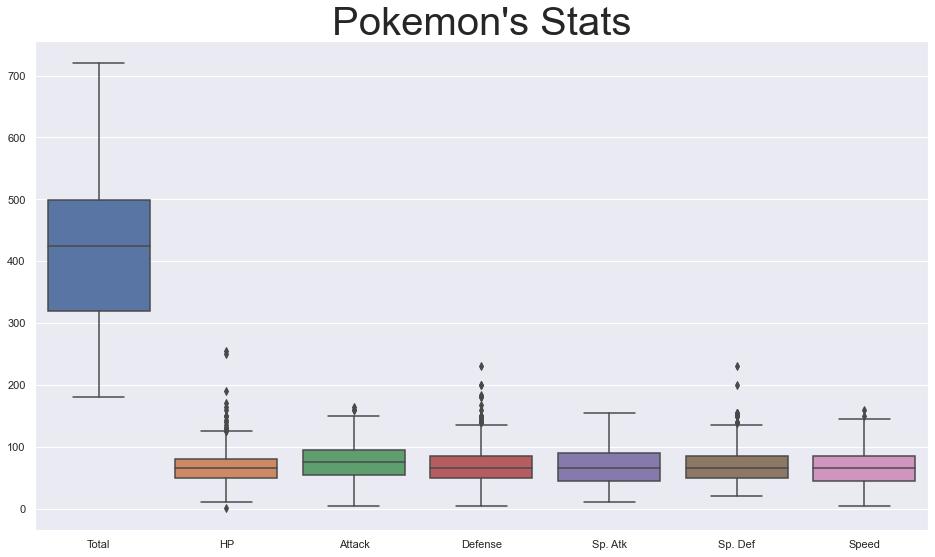

In [13]:
sns.set(rc={'figure.figsize':(16,9)})

# boxplot without 2 last columns: generation and legendary
sns.boxplot(data=pokemons_df[pokemons_df.columns[:-2]]).set_title("Pokemon's Stats", fontsize=40)

Statistics have diffrent range of values, so compiring them will not be meaningful.

## 2. Comparison of types/elements
Our pokemons has a lot of types. Most of them has 2 types but rest of them has 1 type.  
Let's make some plots.

<AxesSubplot:ylabel='Type 2'>

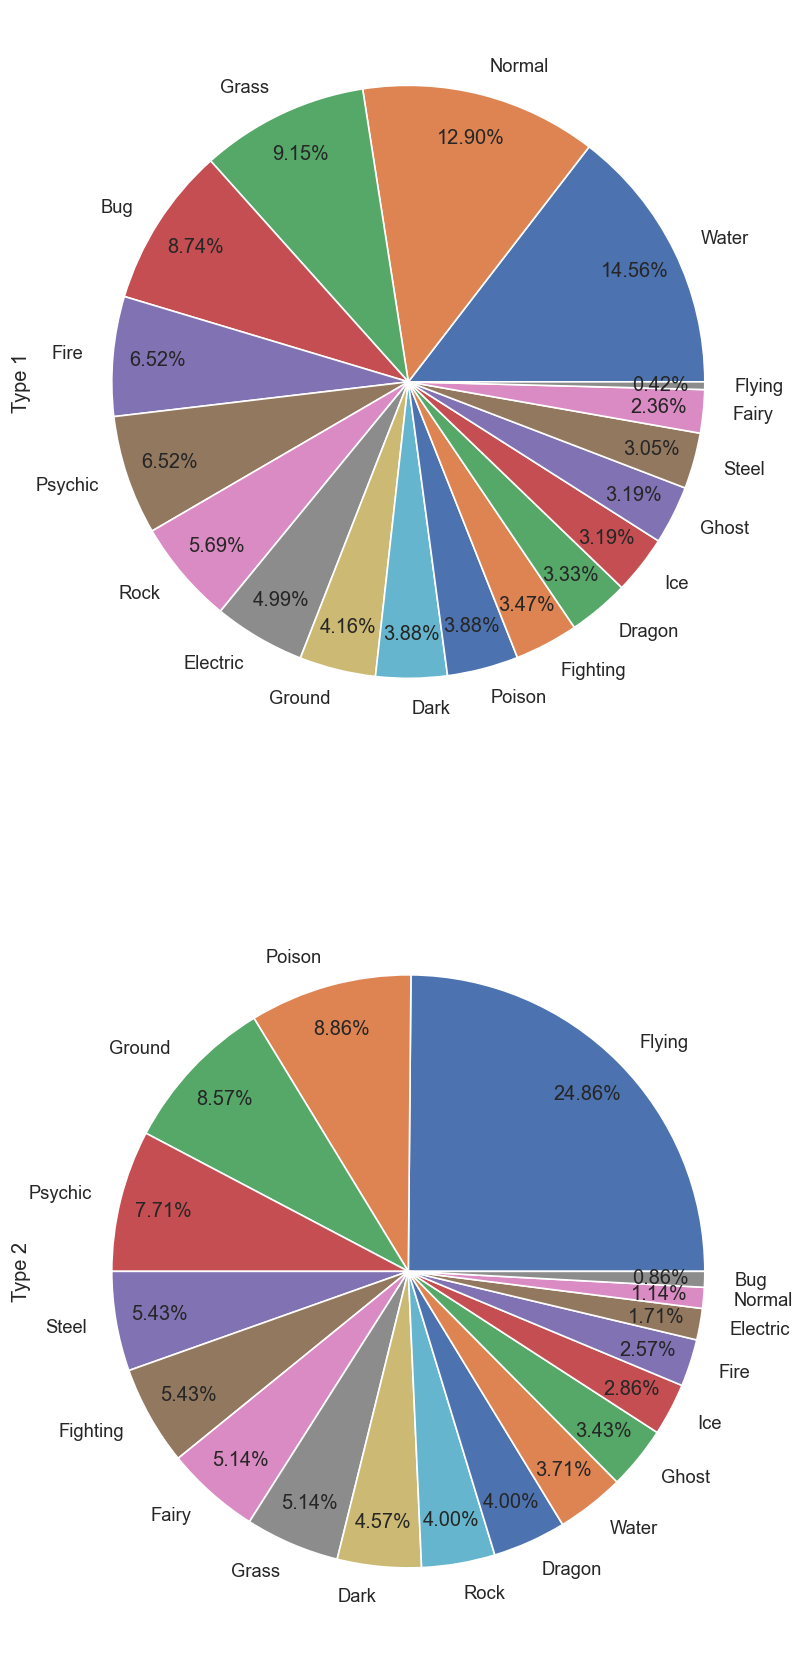

In [14]:
fig = plt.figure(figsize=(16,18), dpi=120)

fig.add_subplot(211)
pokemons_df['Type 1'].value_counts().plot(kind='pie', 
                                        autopct='%1.2f%%',
                                        pctdistance = 0.85)

fig.add_subplot(212)
pokemons_df['Type 2'].value_counts().plot(kind='pie', 
                                       autopct='%1.2f%%',
                                       pctdistance=0.85)

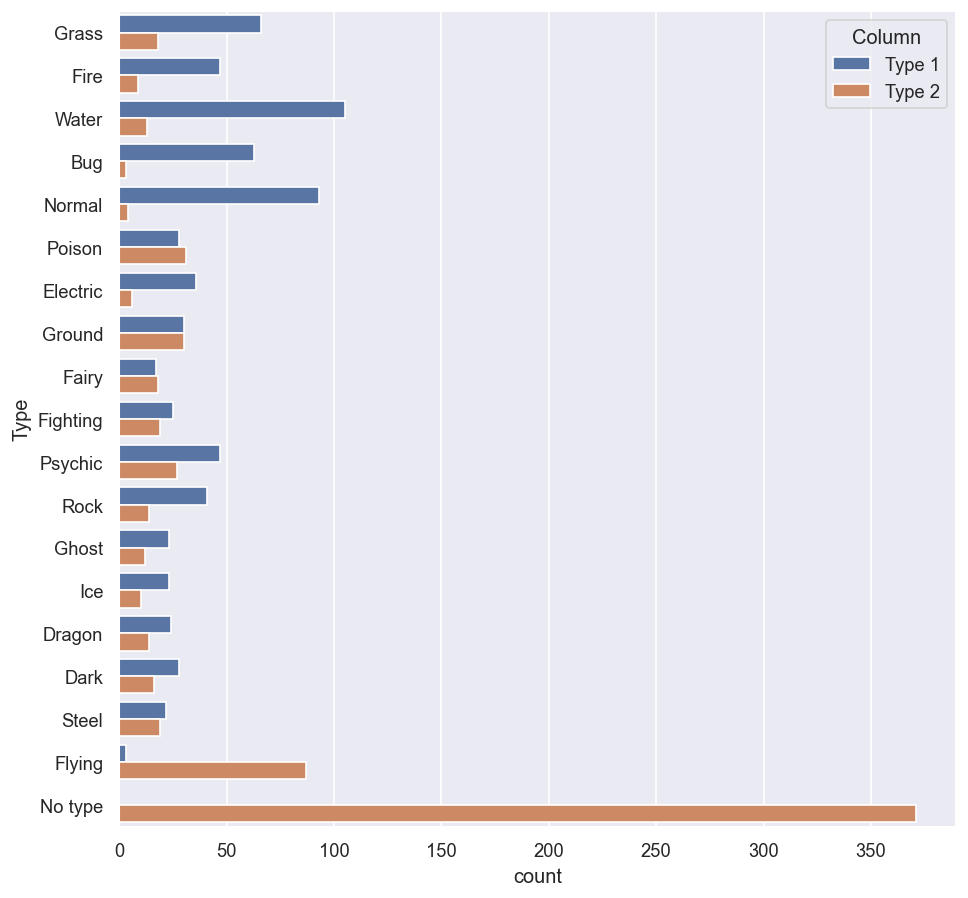

In [15]:
types_1 = pd.DataFrame()
types_1['Type'] = pokemons_df['Type 1']
types_1['Column']='Type 1'

types_2 = pd.DataFrame()
types_2['Type'] = pokemons_df['Type 2']
types_2['Column']='Type 2'

types = types_1.append(types_2, ignore_index = True)

cat_list = types.Type.cat.categories.to_list()
cat_list.extend(["No type"])
types['Type'] = pd.Categorical(types['Type'], cat_list)
types.Type.fillna(value='No type', inplace=True)

_, ax = plt.subplots(figsize=(9,9), dpi =120)
sns.countplot(y='Type', hue='Column', data=types, ax=ax)
None

#### work in progress